# 对dcm和h5文件进行可视化

## 原始图像

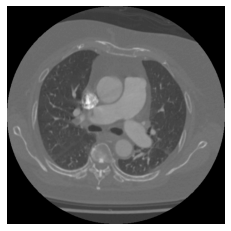

In [4]:
import matplotlib.pyplot as plt
import pydicom
from skimage import exposure
# 读取DICOM文件
path = r"F:\王文江DL\预后不良\T1\ZHANG_YUN_ZHI-211025821\ZHANG_YUN_ZHI_09_0186_0186.dcm"
dcm = pydicom.dcmread(path)

# 获取像素数据
image = dcm.pixel_array

# 绘制图像
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

## 预处理后的图像

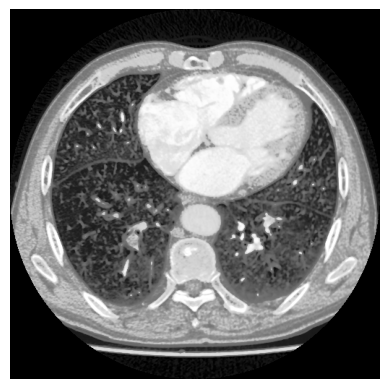

In [10]:
import h5py
import matplotlib.pyplot as plt
file_path = r"F:\CR的均值化数据\train\BAI_GUANG_YI_08_0170_0170_951.h5"
with h5py.File(file_path, 'r') as f:
    low_energy_data = f['LOW_ENERGY'][:]
    
    
plt.subplot(1,1,1)
plt.imshow(low_energy_data, cmap='gray')
plt.axis('off')
plt.show()   
    

# 绘制损失图、准确率图
数据保存在npz文件中

##  绘制损失图

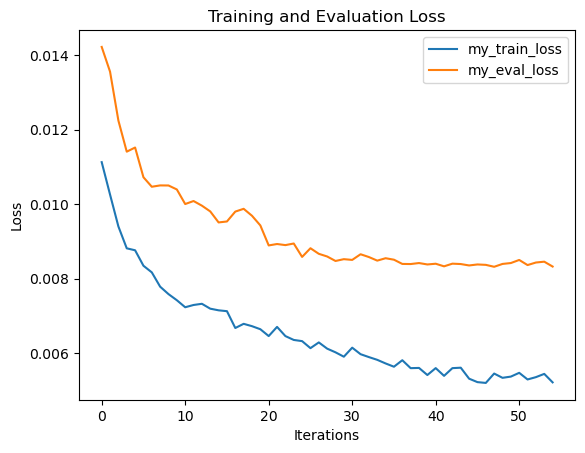

In [143]:
import numpy as np
import os
import matplotlib.pyplot as plt

# 读取npz文件
folder_path = r"C:\Users\Administrator\Desktop\LJJ\Loss"
data = np.load(os.path.join(folder_path, 'loss.npz'))

# 获取my_train_loss的值
my_train_loss = data['my_train_loss']
#print("my_train_loss:", my_train_loss)

# 获取my_eval_loss的值
my_eval_loss = data['my_eval_loss']
#print("my_eval_loss:", my_eval_loss)




# 绘制my_train_loss和my_eval_loss的图形
plt.plot(my_train_loss, label='my_train_loss')
plt.plot(my_eval_loss, label='my_eval_loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss')
plt.legend()
plt.show()

## 绘制准确率图

max my_train_correct: 0.87003225
max my_eval_correct: 0.8120301


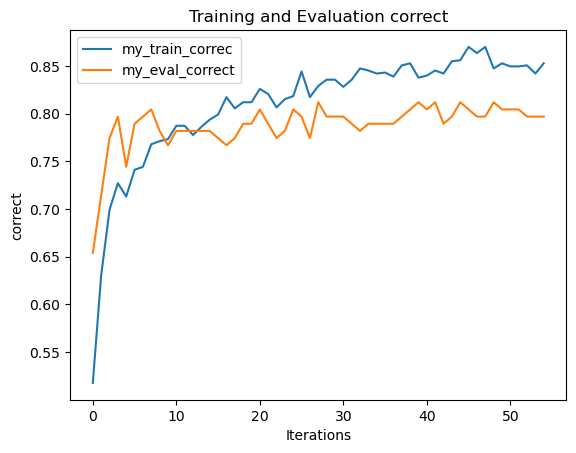

In [144]:
# 获取my_train_correct的值
my_train_correct = data['my_train_correct']
print("max my_train_correct:",max(my_train_correct))

# 获取my_eval_correct的值
my_eval_correct = data['my_eval_correct']
print("max my_eval_correct:",max(my_eval_correct))

# 绘制my_train_loss和my_eval_loss的图形
plt.plot(my_train_correct, label='my_train_correc')
plt.plot(my_eval_correct, label='my_eval_correct')
plt.xlabel('Iterations')
plt.ylabel('correct')
plt.title('Training and Evaluation correct')
plt.legend()
plt.show()

In [39]:
# 关闭npz文件
data.close()

# 绘制roc曲线、PR曲线、绘制混淆矩阵
数据保存在CSV文件中

## 绘制roc曲线

In [150]:
import csv

def get_column_values(csv_file, column_index):
    values = []
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            values.append(row[column_index:])
    return values

# 示例使用
csv_file = r"C:\Users\Administrator\Desktop\LJJ\testdata.csv"
column_index = 0  # 假设label列在第一列，索引为0
column_values = get_column_values(csv_file, column_index)
print(column_values)

[['accuracy', 'tensor(0.7782)'], ['auc_score', '0.8744371615844971'], ['Recall_L', 'tensor(0.7355)'], ['Precision_L', 'tensor(0.7672)'], ['Npv_L', '0.7866666913032532'], ['ppv_l', 'tensor(0.7672)'], ['Specificity_L', '0.8137931227684021'], ['F1_score_L', '0.7510548233985901'], ['False_alarm_rate_L', '0.1862068921327591'], ['Test set: Accuracy', '0.7781955003738403'], ['auc_precision_recall', '0.8718514894172406'], ['label', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0

In [156]:
import csv
import numpy as np

def parse_value(value):
    # 尝试解析为浮点数，如果失败则保留原值
    try:
        if "tensor" in value:
            return float(value.replace("tensor(", "").replace(")", ""))
        return float(value)
    except ValueError:
        return value

def csv_to_dict_with_numpy(csv_file):
    result_dict = {}

    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            key = row[0]
            values = np.array([parse_value(val) for val in row[1:]])
            result_dict[key] = values

    return result_dict

# 示例使用
csv_file = r"C:\Users\Administrator\Desktop\LJJ\testdata.csv"
result_dict = csv_to_dict_with_numpy(csv_file)
print(result_dict)


{'accuracy': array([0.7782]), 'auc_score': array([0.87443716]), 'Recall_L': array([0.7355]), 'Precision_L': array([0.7672]), 'Npv_L': array([0.78666669]), 'ppv_l': array([0.7672]), 'Specificity_L': array([0.81379312]), 'F1_score_L': array([0.75105482]), 'False_alarm_rate_L': array([0.18620689]), 'Test set: Accuracy': array([0.7781955]), 'auc_precision_recall': array([0.87185149]), 'label': array([1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       

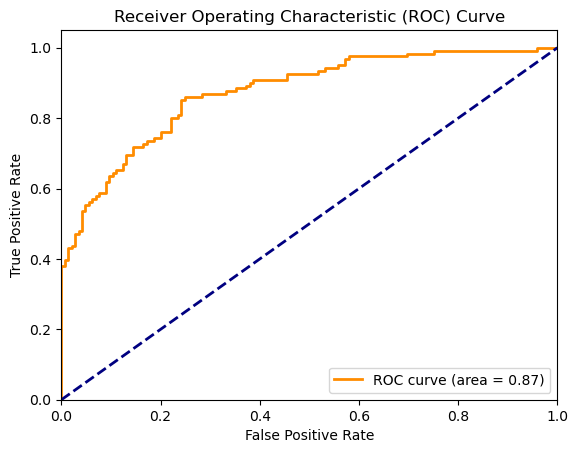

In [158]:
from sklearn.metrics import roc_curve, auc


def plot_roc_curve(true_labels, predicted_probs):
    fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    
# 假设字典中的 'label' 键对应真实标签，'pro' 键对应预测概率
true_labels = result_dict.get('label')
predicted_probs = result_dict.get('pro')

# 检查数据是否存在并且长度匹配
if true_labels is not None and predicted_probs is not None and len(true_labels) == len(predicted_probs):
    plot_roc_curve(true_labels, predicted_probs)
else:
    print("数据不匹配或缺失")

## 绘制PR曲线

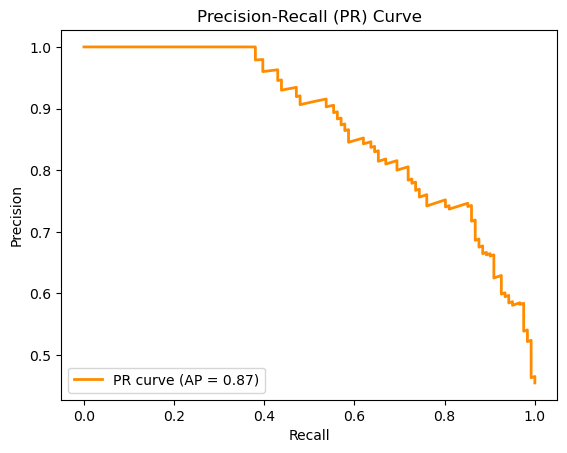

In [160]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_pr_curve(true_labels, predicted_probs):
    precision, recall, _ = precision_recall_curve(true_labels, predicted_probs)
    average_precision = average_precision_score(true_labels, predicted_probs)

    plt.figure()
    plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (AP = {average_precision:0.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall (PR) Curve')
    plt.legend(loc="lower left")
    plt.show()

# 从字典中获取真实标签和预测概率
true_labels = result_dict.get('label')
predicted_probs = result_dict.get('pro')

# 检查数据是否存在并且长度匹配
if true_labels is not None and predicted_probs is not None and len(true_labels) == len(predicted_probs):
    plot_pr_curve(true_labels, predicted_probs)
else:
    print("数据不匹配或缺失")


## 绘制混淆矩阵

In [169]:

from prettytable import PrettyTable
class ConfusionMatrix(object):
    """
    注意，如果显示的图像不全，是matplotlib版本问题
    本例程使用matplotlib-3.2.1(windows and ubuntu)绘制正常
    需要额外安装prettytable库
    """
    def __init__(self, num_classes: int, labels: list):
        self.matrix = np.zeros((num_classes, num_classes))
        self.num_classes = num_classes
        self.labels = labels

    def update(self, preds, labels):
        for p, t in zip(preds, labels):
            self.matrix[p, t] += 1

    def summary(self):
        # calculate accuracy
        sum_TP = 0
        for i in range(self.num_classes):
            sum_TP += self.matrix[i, i]
        acc = sum_TP / np.sum(self.matrix)
        print("the model accuracy is ", acc)

        # precision, recall, specificity
        table = PrettyTable()
        table.field_names = ["", "Precision", "Recall", "Specificity"]
        for i in range(self.num_classes):
            TP = self.matrix[i, i]
            FP = np.sum(self.matrix[i, :]) - TP
            FN = np.sum(self.matrix[:, i]) - TP
            TN = np.sum(self.matrix) - TP - FP - FN
            Precision = round(TP / (TP + FP), 3) if TP + FP != 0 else 0.
            Recall = round(TP / (TP + FN), 3) if TP + FN != 0 else 0.
            Specificity = round(TN / (TN + FP), 3) if TN + FP != 0 else 0.
            table.add_row([self.labels[i], Precision, Recall, Specificity])
        print(table)

    def plot(self):
        matrix = self.matrix
        print(matrix)
        plt.imshow(matrix, cmap=plt.cm.Blues)

        # 设置x轴坐标label
        plt.xticks(range(self.num_classes), self.labels, rotation=45)
        # 设置y轴坐标label
        plt.yticks(range(self.num_classes), self.labels)
        # 显示colorbar
        plt.colorbar()
        plt.xlabel('True Labels')
        plt.ylabel('Predicted Labels')
        plt.title('Confusion matrix')

        # 在图中标注数量/概率信息
        thresh = matrix.max() / 2
        for x in range(self.num_classes):
            for y in range(self.num_classes):
                # 注意这里的matrix[y, x]不是matrix[x, y]
                info = int(matrix[y, x])
                plt.text(x, y, info,
                         verticalalignment='center',
                         horizontalalignment='center',
                         color="white" if info > thresh else "black")
        plt.tight_layout()
        plt.show()


[[118.  32.]
 [ 27.  89.]]


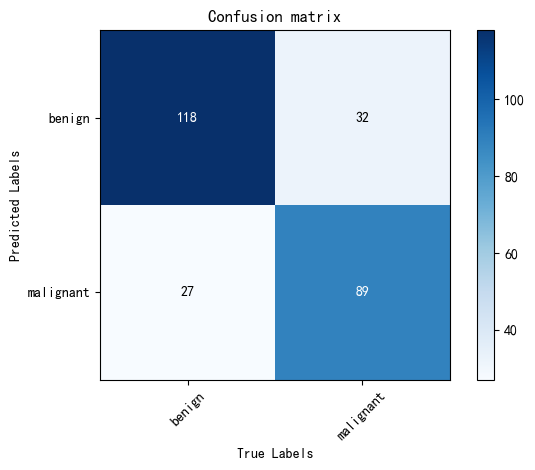

the model accuracy is  0.7781954887218046
+-----------+-----------+--------+-------------+
|           | Precision | Recall | Specificity |
+-----------+-----------+--------+-------------+
|   benign  |   0.787   | 0.814  |    0.736    |
| malignant |   0.767   | 0.736  |    0.814    |
+-----------+-----------+--------+-------------+


In [170]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 ConfusionMatrix 类已定义

# 从字典中获取真实标签和预测标签
true_labels = result_dict.get('label')
predicted_labels = result_dict.get('pro_lab')

# 确保标签数据为整数类型
true_labels = true_labels.astype(int)
predicted_labels = predicted_labels.astype(int)

# 设置全局字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 混淆矩阵的坐标轴名，0为benign，1为malignent，与预处理时候保存的0,1对应
name = ['benign', 'malignant']
confusion = ConfusionMatrix(num_classes=2, labels=name)
confusion.update(predicted_labels, true_labels)

# 绘制和显示混淆矩阵
confusion.plot()
confusion.summary()
